# **Exercício**



O objetivo deste exercício é praticar atividades de obtenção, manipulação e análise de dados que seriam desempenhadas por um gestor de portfólio.

O foco é a biblioteca Pandas, mas você pode utilizar outra bibliotecas sempre que julgar necessário.

No exercício, você precisa desempenhar as seguintes tarefas:

1. Carregar no Python com a biblioteca pandas os arquivos .csv e .txt que foram passados. O arquivo .csv contém cotações de papéis brasileiros, e o arquivo .txt contém cotações de ações americanas.
2.  Utilizando a biblioteca yfinance, ou alguma outra fonte de sua escolha, obtenha os dados da cotação do dólar (apenas o Close) desde o dia inicial do dataframe das ações americanas (.txt)
3. Converta a cotação das ações americanas de dólar para real, utilizando os dados de cotação do dólar que você obteve anteriormente e crie um novo dataframe com o resultado desta operação.
4. Utilizando a função merge da Pandas, realize uma união entre os dataframes de ações brasileiras e o outro de ações americanas com as cotações convertidas para real.
5. Agora você vai simular o desempenho de uma carteira teórica. Para isto, considere a data de início dos aportes como sendo 05-03-2018. Considere que houve apenas um aporte. A carteira que você deve simular é a seguinte: 100 ações de PETR4, 100 ações de VALE3, 100 ações de LREN3, 200 ações de WEGE3, 10 ações de AAPL, 15 ações de META, 30 ações de Coca-Cola(KO) e 20 ações de Morgan Stanley (MS). Qual seria o saldo aproximado desta carteira, em R$ no dia 06/04/23?
6. Utilizando a yfinance, obtenha dados do IBOV e S&P 500. Junte isso aos dados do dólar anteriormente. Para o IBOV, utilize o ticker '^BVSP' e para o S&P500 utilize '^GSPC'. Modifique o nome dessas colunas para que no dataframe fiquem como 'IBOV' e 'S&P500'.
7. Crie um plot que compara o desempenho da carteira acima com o IBOV, S&P 500 e o dólar.
8. Qual era o saldo da carteira no dia 02/03/2020?



**Dicas importantes**

a. Na hora de carregar os arquivos .csv e .txt, fique atento à suas características, como separador, marcador decimal, formato do índice, dentre outros

b. Possivelmente, os dados da cotação do dólar vão ter um número de linhas superior ao dataframe de ações americanas, mesmo que sejam referentes à mesma data de início e de fim. Você pode utilizar o método para equalizar os índices e garantir que tenham o mesmo número de linhas

c. Para realizar a multiplicação entre o dataframe de ações americanas e cotação do dólar, você pode usar o método "mul", com uma estrutura parecida com esta:

*americanas.mul(dolar, axis=0)*

## 1. Leitura dos papéis brasileiros e cotações de ações americanas

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (12,8)

sns.set_theme(style="darkgrid")

In [2]:
df_br = pd.read_csv('bases_case1/acoes_brasileiras.csv', sep=";",decimal=',')
df_br['Date'] = pd.to_datetime(df_br['Date'], format='%Y-%m-%d')
df_us = pd.read_csv('bases_case1/acoes_americanas.txt', sep=";")
df_us['Date'] = pd.to_datetime(df_us['Date'], format='%Y-%m-%d')

In [14]:
df_br.head()

,Date,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
0,2005-01-03,5167.226562,3.752022,8.902522,0.825184
1,2005-01-04,5167.226562,3.707412,8.539765,0.825184
2,2005-01-05,5167.226562,3.693071,8.480296,0.825184
3,2005-01-06,5167.226562,3.704225,8.444613,0.825184
4,2005-01-07,5167.226562,3.720555,8.670596,0.825184


In [4]:
df_br.dtypes

Date        datetime64[ns]
LREN3.SA           float64
PETR4.SA           float64
VALE3.SA           float64
WEGE3.SA           float64
dtype: object

In [5]:
df_br.describe()

,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
count,4541.000000,4541.000000,4541.000000,4541.000000
mean,218.200204,9.865522,28.840402,8.891268
std,1301.405980,4.845685,20.734838,11.335573
min,0.892573,1.850761,5.583508,0.809005
25%,4.847134,6.899048,15.915184,2.040649
50%,10.345457,8.792815,21.834671,3.887066
75%,26.687101,12.070403,33.117466,8.600175
max,10334.453125,33.003029,95.894073,44.467350


In [6]:
df_br.isnull().sum()

Date        0
LREN3.SA    0
PETR4.SA    0
VALE3.SA    0
WEGE3.SA    0
dtype: int64

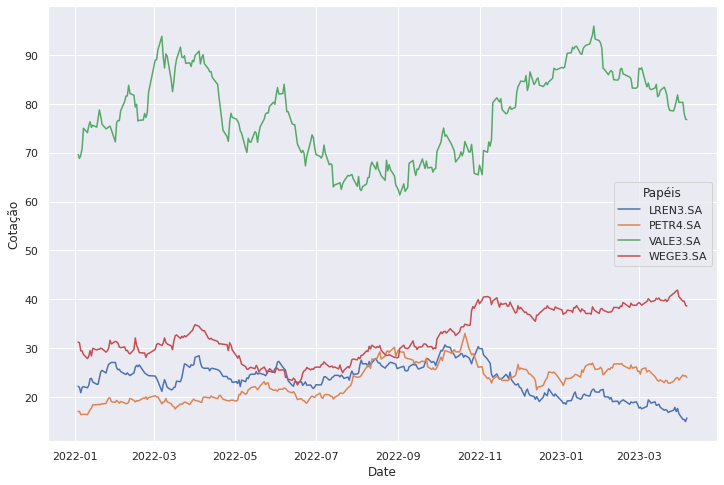

In [7]:
df_br_new = pd.melt(df_br, id_vars='Date', value_vars=['LREN3.SA', 'PETR4.SA', 'VALE3.SA', 'WEGE3.SA'], value_name='Cotação', var_name='Papéis')
plt.figure(figsize=(12,8))
sns.lineplot(x='Date', y='Cotação', hue = 'Papéis', data=df_br_new.loc[df_br_new['Date'].dt.year >= 2022])
plt.show()

In [15]:
df_us.head()

,Date,AAPL,KO,META,MS,MSFT
0,2008-01-02,5.922567,19.046688,NaN,37.577785,25.791210
1,2008-01-03,5.925303,19.246229,NaN,37.570412,25.901058
2,2008-01-04,5.472996,19.283632,NaN,36.360840,25.176090
3,2008-01-07,5.399737,19.738840,NaN,35.630688,25.344519
4,2008-01-08,5.205502,19.819902,NaN,34.221977,24.495070


In [9]:
df_us.dtypes

Date    datetime64[ns]
AAPL           float64
KO             float64
META           float64
MS             float64
MSFT           float64
dtype: object

In [10]:
df_us.describe()

,AAPL,KO,META,MS,MSFT
count,3843.000000,3843.000000,2739.000000,3843.000000,3843.000000
mean,45.182744,34.249513,148.593118,36.918227,87.805868
std,48.585946,13.021926,86.131248,23.168089,89.022771
min,2.377052,12.142509,17.730000,7.001352,11.376364
25%,11.921888,23.789288,78.449997,21.242930,22.512109
50%,25.078003,32.807693,144.850006,28.998711,41.771603
75%,51.260590,42.589426,191.514999,43.315348,127.520821
max,180.683868,64.306442,382.179993,104.919655,339.075562


In [11]:
df_us.columns

Index(['Date', 'AAPL', 'KO', 'META', 'MS', 'MSFT'], dtype='object')

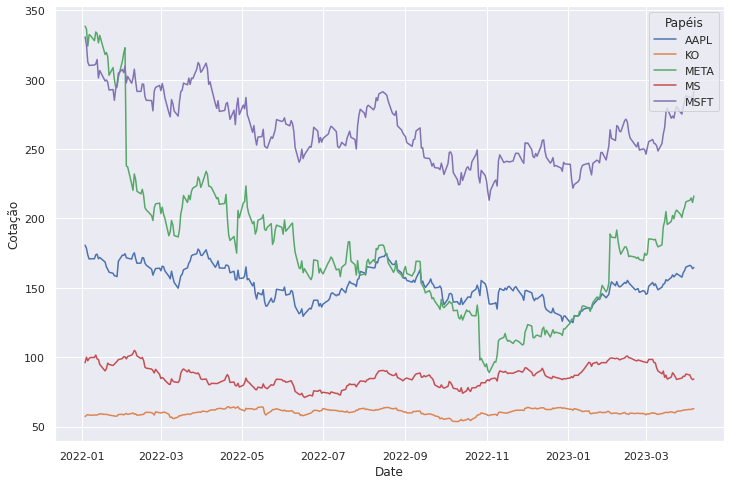

In [12]:
df_us_new = pd.melt(df_us, id_vars='Date', value_vars=['AAPL', 'KO', 'META', 'MS', 'MSFT'], value_name='Cotação', var_name='Papéis')
plt.figure(figsize=(12,8))
sns.lineplot(x='Date', y='Cotação', hue='Papéis', data=df_us_new.loc[df_us_new['Date'].dt.year >= 2022])
plt.show()

In [13]:
df_us['Date'].min(), df_us['Date'].max()

(Timestamp('2008-01-02 00:00:00'), Timestamp('2023-04-06 00:00:00'))

## 2. Cotação do dolar

In [16]:
import yfinance as yf

dolar = yf.download('BRL=X', start='2008-01-02')
dolar = dolar[['Close']]
dolar = dolar.reset_index()

[*********************100%***********************]  1 of 1 completed


In [17]:
dolar.tail()

,Date,Close
3986,2023-05-25,4.9586
3987,2023-05-26,5.0352
3988,2023-05-29,4.9928
3989,2023-05-30,5.0181
3990,2023-05-31,5.0419


## 3. Converta a cotação das ações americanas de dólar para real, utilizando os dados de cotação do dólar que você obteve anteriormente e crie um novo dataframe com o resultado desta operação.

In [18]:
df_us.columns

Index(['Date', 'AAPL', 'KO', 'META', 'MS', 'MSFT'], dtype='object')

In [19]:
df_us_new = df_us[['AAPL', 'KO', 'META', 'MS', 'MSFT']].mul(dolar['Close'], axis=0)
df_us_new['Date'] = df_us['Date']

In [25]:
'''df_us_new = df_us.merge(dolar, on='Date', how='left')
for col in ['AAPL', 'KO', 'META', 'MS', 'MSFT']:
    df_us_new[col] = df_us_new[col]*df_us_new['Close']'''

"df_us_new = df_us.merge(dolar, on='Date', how='left')\nfor col in ['AAPL', 'KO', 'META', 'MS', 'MSFT']:\n    df_us_new[col] = df_us_new[col]*df_us_new['Close']"

In [20]:
df_us_new.head()

,AAPL,KO,META,MS,MSFT,Date
0,10.450370,33.607882,NaN,66.306003,45.508591,2008-01-02
1,10.357431,33.642409,NaN,65.673081,45.275050,2008-01-03
2,9.617148,33.885199,NaN,63.893268,44.239426,2008-01-04
3,9.525137,34.819315,NaN,62.852535,44.707732,2008-01-07
4,9.120039,34.724469,NaN,59.956903,42.915361,2008-01-08


## 4. Utilizando a função merge da Pandas, realize uma união entre os dataframes de ações brasileiras e o outro de ações americanas com as cotações convertidas para real.

In [27]:
df = df_br.merge(df_us_new[['Date', 'AAPL', 'KO', 'META', 'MS', 'MSFT']], on='Date', how='inner')
df = df.loc[df['Date']>='2018-03-05']
df

,Date,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,AAPL,KO,META,MS,MSFT
2461,2018-03-05,28.429731,9.747345,29.805807,8.130662,136.648232,120.467541,584.965014,156.111748,286.564970
2462,2018-03-06,28.095844,9.650399,29.662579,8.116373,136.435473,120.491831,582.541119,159.009144,285.383103
2463,2018-03-07,28.177280,9.549047,29.558081,8.062789,134.918623,119.967537,594.173256,159.612658,286.503075
2464,2018-03-08,28.217999,9.562267,28.599255,8.019918,138.621744,123.682742,599.388031,162.451435,292.957377
2465,2018-03-09,29.170815,9.866319,29.040730,8.216399,141.029157,124.735017,608.999194,167.358949,299.558089
...,...,...,...,...,...,...,...,...,...,...
3689,2023-03-31,16.570000,23.450001,80.290001,40.549999,872.073590,328.045638,1120.844667,464.330301,1524.674437
3690,2023-04-03,15.410000,24.490000,80.309998,39.590000,860.561204,323.157135,1103.446977,451.384236,1487.506811
3691,2023-04-04,15.390000,24.270000,78.040001,39.630001,851.735702,319.908686,1104.176089,436.178348,1476.794333
3692,2023-04-05,14.970000,24.350000,76.889999,38.750000,842.152157,322.955280,1087.557039,431.052735,1462.246882


## 5. Simular o desempenho de uma carteira teórica. Para isto, considere a data de início dos aportes como sendo 05-03-2018. Considere que houve apenas um aporte. A carteira que você deve simular é a seguinte: 100 ações de PETR4, 100 ações de VALE3, 100 ações de LREN3, 200 ações de WEGE3, 10 ações de AAPL, 15 ações de META, 30 ações de Coca-Cola(KO) e 20 ações de Morgan Stanley (MS). Qual seria o saldo aproximado desta carteira, em R_S no dia 06/04/23?

In [28]:
acoes = {'LREN3.SA': 100, 
         'PETR4.SA': 100, 
         'VALE3.SA': 100, 
         'WEGE3.SA': 200, 
         'AAPL': 10, 
         'KO': 30,
         'META': 15, 
         'MS': 20}

qtd_acoes = pd.Series(data=acoes, index=list(acoes.keys()))
qtd_acoes

LREN3.SA    100
PETR4.SA    100
VALE3.SA    100
WEGE3.SA    200
AAPL         10
KO           30
META         15
MS           20
dtype: int64

In [29]:
date = df['Date']
df = df[['LREN3.SA', 'PETR4.SA', 'VALE3.SA', 'WEGE3.SA', 'AAPL', 'KO',
       'META', 'MS', 'MSFT']]*qtd_acoes

df['Date'] = date
df

,AAPL,KO,LREN3.SA,META,MS,MSFT,PETR4.SA,VALE3.SA,WEGE3.SA,Date
2461,1366.482320,3614.026243,2842.973137,8774.475206,3122.234966,NaN,974.734497,2980.580711,1626.132393,2018-03-05
2462,1364.354727,3614.754926,2809.584427,8738.116789,3180.182873,NaN,965.039921,2966.257858,1623.274612,2018-03-06
2463,1349.186233,3599.026113,2817.728043,8912.598840,3192.253160,NaN,954.904747,2955.808067,1612.557793,2018-03-07
2464,1386.217436,3710.482271,2821.799850,8990.820468,3249.028709,NaN,956.226730,2859.925461,1603.983688,2018-03-08
2465,1410.291572,3742.050495,2917.081451,9134.987904,3347.178989,NaN,986.631870,2904.072952,1643.279839,2018-03-09
...,...,...,...,...,...,...,...,...,...,...
3689,8720.735900,9841.369144,1656.999969,16812.670010,9286.606028,NaN,2345.000076,8029.000092,8109.999847,2023-03-31
3690,8605.612041,9694.714036,1540.999985,16551.704648,9027.684724,NaN,2448.999977,8030.999756,7918.000031,2023-04-03
3691,8517.357020,9597.260583,1539.000034,16562.641331,8723.566969,NaN,2427.000046,7804.000092,7926.000214,2023-04-04
3692,8421.521575,9688.658394,1497.000027,16313.355579,8621.054708,NaN,2435.000038,7688.999939,7750.000000,2023-04-05


In [30]:
df['Carteira'] = df[['LREN3.SA', 'PETR4.SA', 'VALE3.SA', 'WEGE3.SA', 'AAPL', 'KO','META', 'MS']].sum(axis=1)
df.tail()

,AAPL,KO,LREN3.SA,META,MS,MSFT,PETR4.SA,VALE3.SA,WEGE3.SA,Date,Carteira
3689,8720.735900,9841.369144,1656.999969,16812.670010,9286.606028,NaN,2345.000076,8029.000092,8109.999847,2023-03-31,64802.381067
3690,8605.612041,9694.714036,1540.999985,16551.704648,9027.684724,NaN,2448.999977,8030.999756,7918.000031,2023-04-03,63818.715197
3691,8517.357020,9597.260583,1539.000034,16562.641331,8723.566969,NaN,2427.000046,7804.000092,7926.000214,2023-04-04,63096.826288
3692,8421.521575,9688.658394,1497.000027,16313.355579,8621.054708,NaN,2435.000038,7688.999939,7750.000000,2023-04-05,62415.590261
3693,8422.194712,9642.609715,1571.000004,16579.949182,8612.469059,NaN,2400.000000,7675.000000,7722.000122,2023-04-06,62625.222793


In [31]:
df.loc[df['Date']=='2023-04-06',['Carteira']]

,Carteira
3693,62625.222793


In [32]:
df.set_index('Date', inplace=True)
df.head()

,AAPL,KO,LREN3.SA,META,MS,MSFT,PETR4.SA,VALE3.SA,WEGE3.SA,Carteira
Date,,,,,,,,,,
2018-03-05,1366.482320,3614.026243,2842.973137,8774.475206,3122.234966,NaN,974.734497,2980.580711,1626.132393,25301.639474
2018-03-06,1364.354727,3614.754926,2809.584427,8738.116789,3180.182873,NaN,965.039921,2966.257858,1623.274612,25261.566134
2018-03-07,1349.186233,3599.026113,2817.728043,8912.598840,3192.253160,NaN,954.904747,2955.808067,1612.557793,25394.062996
2018-03-08,1386.217436,3710.482271,2821.799850,8990.820468,3249.028709,NaN,956.226730,2859.925461,1603.983688,25578.484613
2018-03-09,1410.291572,3742.050495,2917.081451,9134.987904,3347.178989,NaN,986.631870,2904.072952,1643.279839,26085.575073


<AxesSubplot:xlabel='Date'>

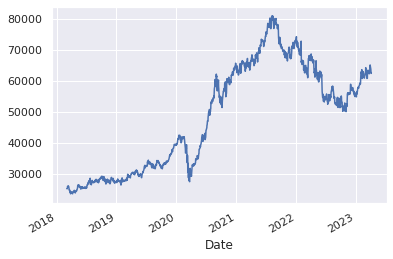

In [34]:
df['Carteira'].plot()

## 6. Utilizando a yfinance, obtenha dados do IBOV e S&P 500. Junte isso aos dados do dólar anteriormente. Para o IBOV, utilize o ticker '^BVSP' e para o S&P500 utilize '^GSPC'. Modifique o nome dessas colunas para que no dataframe fiquem como 'IBOV' e 'S&P500'.

In [35]:
ibov = yf.download('^BVSP', start='2018-03-05')['Close']
ibov = ibov.reset_index()
ibov.rename(columns={'Close':'IBOV'}, inplace=True)
ibov.tail()

[*********************100%***********************]  1 of 1 completed


,Date,IBOV
1294,2023-05-24,108800.0
1295,2023-05-25,110054.0
1296,2023-05-26,110906.0
1297,2023-05-29,110333.0
1298,2023-05-30,108967.0


In [36]:
sep = yf.download('^GSPC', start='2018-03-05')['Close']
sep = sep.reset_index()
sep.rename(columns={'Close':'S&P500'}, inplace=True)
sep.tail()

[*********************100%***********************]  1 of 1 completed


,Date,S&P500
1314,2023-05-23,4145.580078
1315,2023-05-24,4115.240234
1316,2023-05-25,4151.279785
1317,2023-05-26,4205.450195
1318,2023-05-30,4205.520020


In [37]:
dolar = yf.download('USDBRL=X', start='2018-03-05')['Close']
dolar = dolar.reset_index()
dolar.rename(columns={'Close':'Dolar'}, inplace=True)
dolar.tail()

[*********************100%***********************]  1 of 1 completed


,Date,Dolar
1362,2023-05-25,4.9586
1363,2023-05-26,5.0352
1364,2023-05-29,4.9928
1365,2023-05-30,5.0181
1366,2023-05-31,5.0419


In [38]:
ibov = pd.merge(ibov,sep, on='Date',how='inner')
ibov = pd.merge(ibov,dolar, on='Date',how='inner')
ibov.head()

,Date,IBOV,S&P500,Dolar
0,2018-03-05,86023.0,2720.939941,3.2496
1,2018-03-06,85653.0,2728.120117,3.2410
2,2018-03-07,85484.0,2726.800049,3.2080
3,2018-03-08,84985.0,2738.969971,3.2429
4,2018-03-09,86371.0,2786.570068,3.2661


## 7. Crie um plot que compara o desempenho da carteira acima com o IBOV, S&P 500 e o dólar.

In [42]:
df.reset_index(inplace=True)

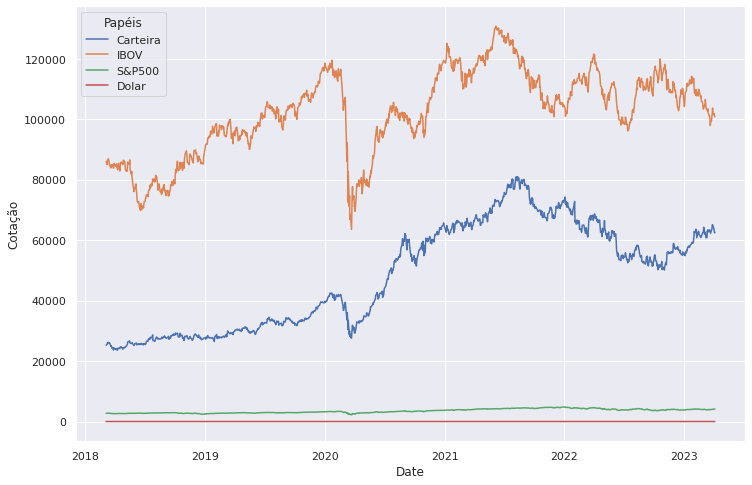

In [44]:
df_plot = df[['Date','Carteira']].merge(ibov, on='Date',how='left')
df_plot_new = pd.melt(df_plot, id_vars='Date', value_vars=['Carteira','IBOV','S&P500','Dolar'], value_name='Cotação', var_name='Papéis')
plt.figure(figsize=(12,8))
sns.lineplot(x='Date', y='Cotação', hue='Papéis', data=df_plot_new)
plt.show()

In [49]:
df_plot.set_index('Date', inplace=True)

In [52]:
norm = df_plot/df_plot.iloc[0]

In [53]:
norm

,Carteira,IBOV,S&P500,Dolar
Date,,,,
2018-03-05,1.000000,1.000000,1.000000,1.000000
2018-03-06,0.998416,0.995699,1.002639,0.997354
2018-03-07,1.003653,0.993734,1.002154,0.987198
2018-03-08,1.010942,0.987933,1.006626,0.997938
2018-03-09,1.030984,1.004045,1.024120,1.005078
...,...,...,...,...
2023-03-31,2.561193,1.184358,1.510254,1.567178
2023-04-03,2.522315,1.179987,1.515840,1.557823
2023-04-04,2.493784,1.184207,1.507053,1.558069


<AxesSubplot:xlabel='Date'>

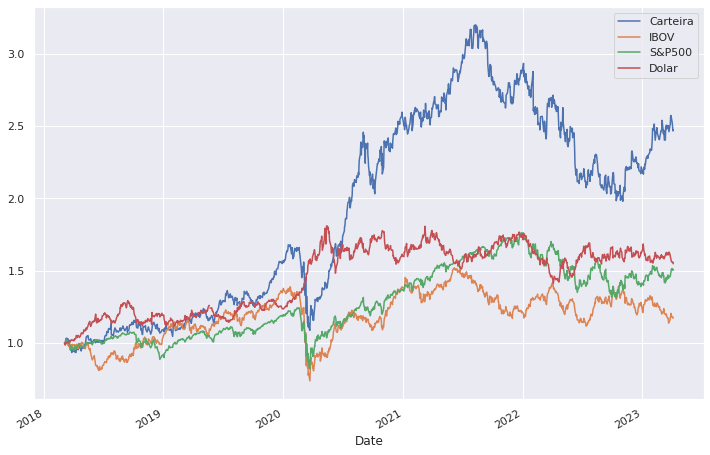

In [62]:
norm.plot()

## 8. Qual era o saldo da carteira no dia 02/03/2020?

In [64]:
df_plot.reset_index(inplace=True)
df_plot.loc[df_plot['Date']=='2020-03-02']

,Date,Carteira,IBOV,S&P500,Dolar
479,2020-03-02,38722.311449,106625.0,3090.22998,4.4413


In [65]:
df_plot.loc[df_plot['Date']=='2020-03-02','Carteira']

479    38722.311449
Name: Carteira, dtype: float64